# Data Stream

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./Bitcoin.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3024,2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920
3025,2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479
3026,2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910
3027,2022-12-31,16603.673828,16628.986328,16517.519531,16547.496094,16547.496094,11239186456


In [ ]:
df = pd.read_csv('./Bitcoin.csv')
df['Open'] = df['Open'].apply(lambda x: math.log(x))
df['High'] = df['High'].apply(lambda x: math.log(x))
df['Low'] = df['Low'].apply(lambda x: math.log(x))
df['Close'] = df['Close'].apply(lambda x: math.log(x))
df.to_csv('./Bitcoin_log.csv', index=False)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,6.143894,6.148840,6.114615,6.125414,457.334015,21056800
1,2014-09-18,6.124377,6.124377,6.023699,6.050771,424.440002,34483200
2,2014-09-19,6.049976,6.058738,5.952027,5.978369,394.795990,37919700
3,2014-09-20,5.978058,6.048072,5.965847,6.013480,408.903992,36863600
4,2014-09-21,6.011475,6.022057,5.974270,5.988513,398.821014,26580100
...,...,...,...,...,...,...,...
3024,2022-12-28,9.724146,9.727238,9.710968,9.714297,16552.572266,17005713920
3025,2022-12-29,9.714282,9.720271,9.711642,9.719705,16642.341797,14472237479
3026,2022-12-30,9.719645,9.719771,9.705553,9.717314,16602.585938,15929162910
3027,2022-12-31,9.717379,9.718903,9.712177,9.713990,16547.496094,11239186456


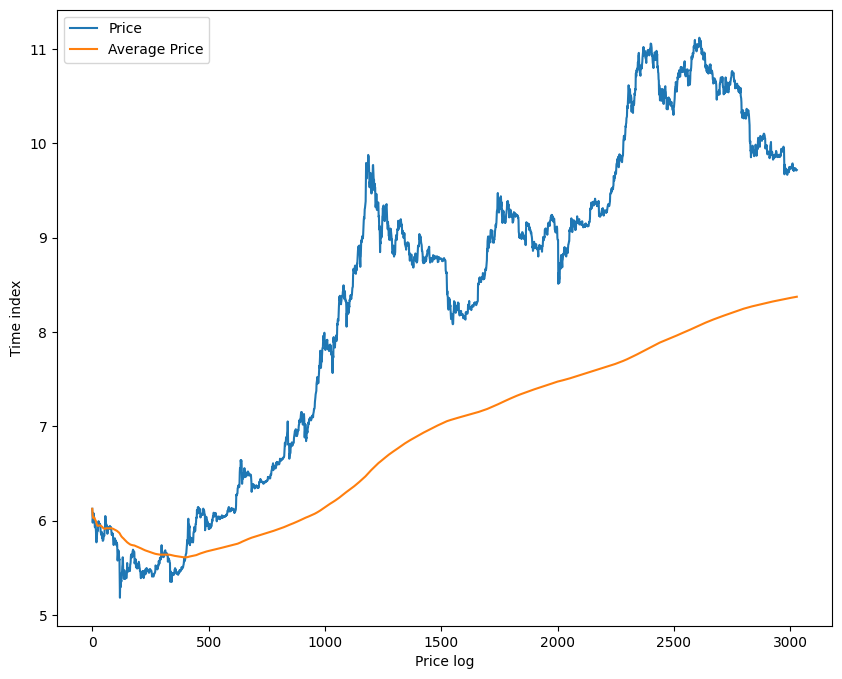

In [ ]:
average_price = []
price = []

sum = 0
lenght = 0
for data in pd.read_csv('./Bitcoin_log.csv', chunksize=1):
    price.append(data['Close'])
    sum += data['Close'].sum()
    lenght += len(data)
    average_price.append( sum / lenght )

plt.figure(figsize=(10, 8))
plt.plot(price, label='Price')
plt.plot(average_price, label='Average Price')
plt.xlabel('Price log')
plt.ylabel('Time index')
plt.legend()
plt.show()

In [ ]:
def calculate_ewm(step_size):
    ewma_array_plot = []
    ewma = None    
    for data in pd.read_csv('./Bitcoin_log.csv', chunksize=1):
        if ewma is None:
            ewma = data['Close'].sum()
        else:
            ewma = (1 - step_size) * ewma + step_size * data['Close'].sum()
        ewma_array_plot.append(ewma)
    
    return ewma_array_plot

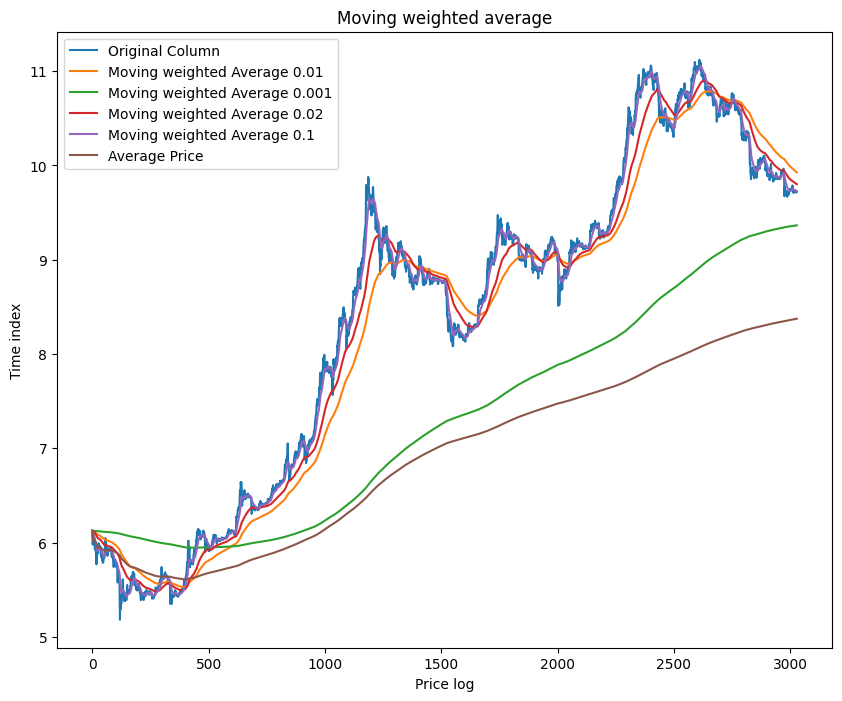

In [ ]:
plt.figure(figsize=(10, 8))

step_size = 0.01
ewma_array = calculate_ewm(step_size)

plt.plot(price, label='Original Column')
plt.plot(ewma_array, label='Moving weighted Average 0.01')

step_size = 0.001
ewma_array = calculate_ewm(step_size)
plt.plot(ewma_array, label='Moving weighted Average 0.001')

step_size = 0.02
ewma_array = calculate_ewm(step_size)
plt.plot(ewma_array, label='Moving weighted Average 0.02')

step_size = 0.1
ewma_array = calculate_ewm(step_size)
plt.plot(ewma_array, label='Moving weighted Average 0.1')

plt.plot(average_price, label='Average Price')
plt.title('Moving weighted average')
plt.xlabel('Price log')
plt.ylabel('Time index')
plt.legend()
plt.show()

/home/danial/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


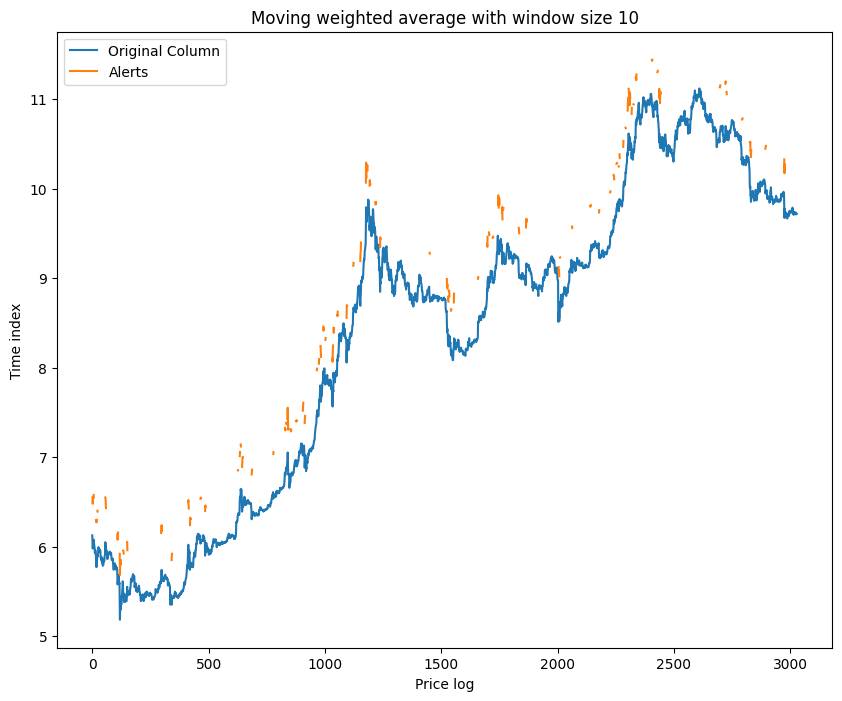

/home/danial/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


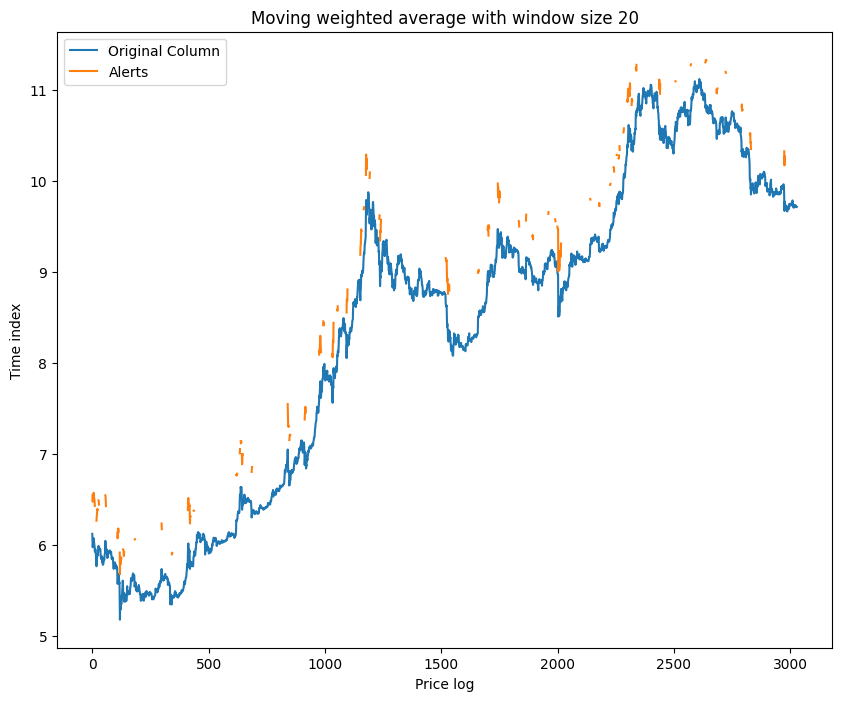

/home/danial/.local/lib/python3.10/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


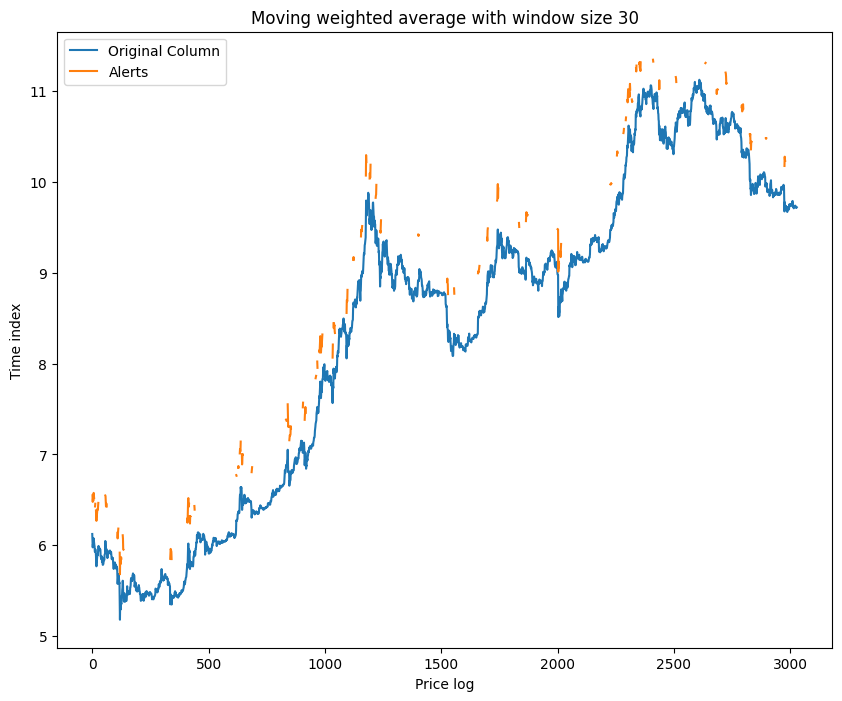

In [ ]:
def detect_alerts(threshold=2.5, step_size=0.01, window_size=10):
    alerts_array = []
    values = []
    var = None
    for data in pd.read_csv('./Bitcoin_log.csv', chunksize=1):
        if len(values) < window_size :
            values.append(data.Open.values)
            values.append(data.High.values)
            values.append(data.Low.values)
            values.append(data.Close.values)
            current_var = np.var(np.array(values, dtype=object))
        else:
            values = []

        if var is None:
            var = current_var
        else:
            var = (1- step_size) * var + step_size * current_var

        if current_var > (threshold * var):
            alerts_array.append(data['Close'].values + 0.5)
        else:
            alerts_array.append(None)
    
    return alerts_array


alerts_array = detect_alerts(2.5, 0.01, 10)
plt.figure(figsize=(10, 8))
plt.plot(price, label='Original Column')
plt.plot(alerts_array, label='Alerts')
plt.title('Moving weighted average with window size 10')
plt.xlabel('Price log')
plt.ylabel('Time index')
plt.legend()
plt.show()

alerts_array = detect_alerts(2.5, 0.01, 20)
plt.figure(figsize=(10, 8))
plt.plot(price, label='Original Column')
plt.plot(alerts_array, label='Alerts')
plt.title('Moving weighted average with window size 20')
plt.xlabel('Price log')
plt.ylabel('Time index')
plt.legend()
plt.show()

alerts_array = detect_alerts(2.5, 0.01, 30)
plt.figure(figsize=(10, 8))
plt.plot(price, label='Original Column')
plt.plot(alerts_array, label='Alerts')
plt.title('Moving weighted average with window size 30')
plt.xlabel('Price log')
plt.ylabel('Time index')
plt.legend()
plt.show()